In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('sample_data/Q1_Dataset.csv')

In [71]:
#a)
# Normalize neighborhood names (caps inconsistency)
df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()

In [72]:
# Group by neighborhood and calculate average rental price
avg_neighborhood_rent = df.groupby('Neighborhood')['Rental_Price'].mean().sort_values()
avg_neighborhood_rent

,Rental_Price
Neighborhood,
Suburbs,3746.313770
Midtown,4006.492098
Uptown,4026.171603
Downtown,4563.614455


In [73]:
lowest_rent = avg_neighborhood_rent.idxmin(), avg_neighborhood_rent.min()
highest_rent = avg_neighborhood_rent.idxmax(), avg_neighborhood_rent.max()

print("Lowest Rent Neighborhood:", lowest_rent)
print("Highest Rent Neighborhood:", highest_rent)

Lowest Rent Neighborhood: ('Suburbs', 3746.313770382258)
Highest Rent Neighborhood: ('Downtown', 4563.614454982456)


<ipython-input-74-37581cdd1770>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Neighborhood', y='Size_in_Sqft', palette='Set2')


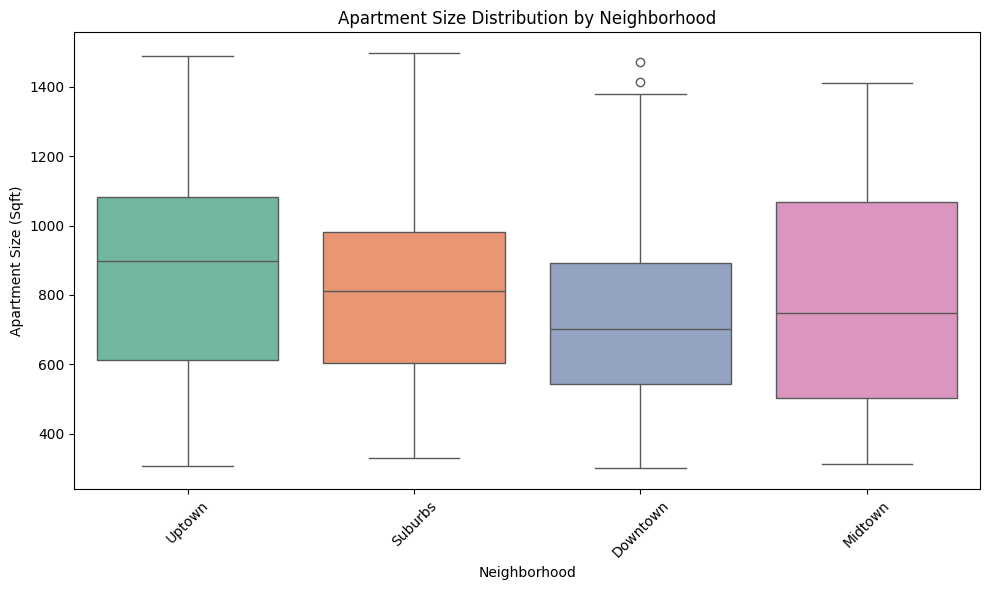

In [74]:
#---------------------------------------------------------------------------------------------------#
#b)
# Boxplot to visualize apartment size variation by neighborhood
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Neighborhood', y='Size_in_Sqft', palette='Set2')
plt.title('Apartment Size Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Apartment Size (Sqft)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
size_summary = df.groupby('Neighborhood')['Size_in_Sqft'].describe()
size_summary

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Downtown,57.0,733.192982,307.678603,301.0,542.00,702.0,891.00,1471.0
Midtown,65.0,777.553846,318.627380,312.0,504.00,748.0,1069.00,1412.0
Suburbs,62.0,825.419355,270.187825,329.0,603.25,810.0,981.25,1497.0
Uptown,68.0,848.014706,307.335953,307.0,613.50,898.5,1083.00,1489.0


Furnished Apartment Counts:
 Furnished     Furnished  Unfurnished
Neighborhood                        
Downtown             34           23
Midtown              50           15
Suburbs              44           18
Uptown               41           27

Proportion of Furnished Apartments by Neighborhood:
 Furnished     Furnished  Unfurnished
Neighborhood                        
Downtown          59.65        40.35
Midtown           76.92        23.08
Suburbs           70.97        29.03
Uptown            60.29        39.71


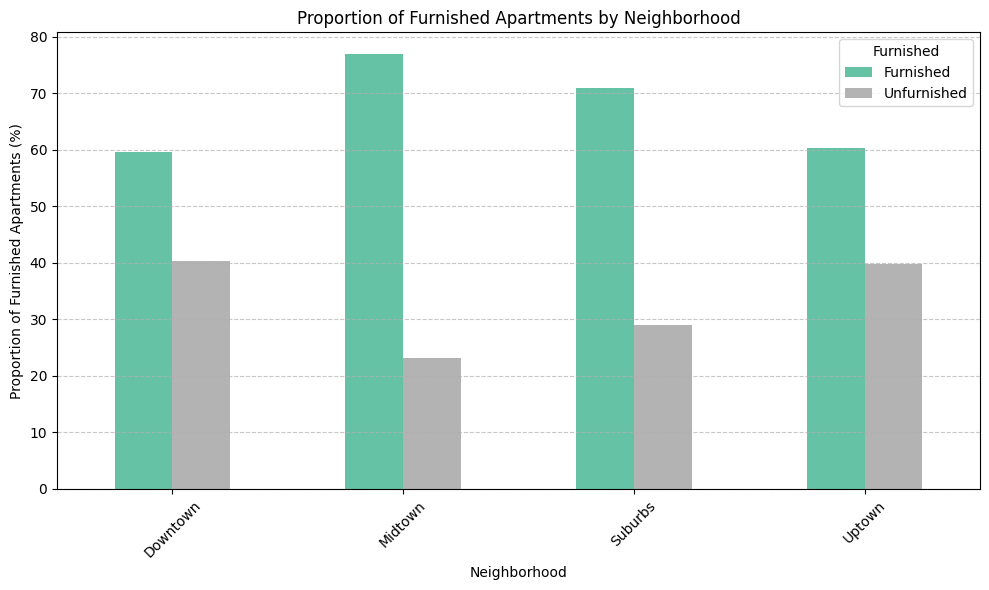

In [76]:
#---------------------------------------------------------------------------------------------------#
#c)
# Normalize columns
df['Furnished'] = df['Furnished'].str.strip().str.title()


# Count furnished/unfurnished apartments per neighborhood
furnish_counts = df.groupby(['Neighborhood', 'Furnished']).size().unstack(fill_value=0)

# Calculate proportion of furnished apartments
furnish_proportions = (furnish_counts.T / furnish_counts.sum(axis=1)).T*100

# Display results
print("Furnished Apartment Counts:\n", furnish_counts)
print("\nProportion of Furnished Apartments by Neighborhood:\n", furnish_proportions.round(2))


#plotting a bar graph
furnish_proportions.plot(kind='bar', stacked=False, figsize=(10, 6),colormap="Set2")
plt.title('Proportion of Furnished Apartments by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Proportion of Furnished Apartments (%)')
plt.xticks(rotation=45)
plt.legend(title='Furnished')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

